- Mount google drive
- Read csv
- Format data into a dataframe
- Create basic tensorflow neural network


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

In [ ]:
!pip install tensorflow[and-cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 851.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 62.5 MB/s eta 0:00:00
  Preparing metadat

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
DEBUG = False
subcolumns = ['ax', 'ay', 'az', 'am', 'rx', 'ry', 'rz']

path = "/content/drive/MyDrive/DSS/kick_data_copy.csv"

with open(path, 'r') as csvfile:
    lines = csvfile.readlines()

kick_data = []
current_movement = None
current_kick_rows = []
kick_dfs = {}
last_movement = None
count = 0
for line in lines:
    line.strip()

    if line.startswith("*"):
        current_movement = line.split(",")[1].strip()
        current_movement = current_movement.replace(" ", "_")
        if DEBUG: print(f"New movement: {current_movement}")
        if count != 0:
            if DEBUG: print(f"Creating dataframe for {last_movement} - {last_movement}{str(count)}\n")
            if DEBUG: print(f"count: {count}\n")
            df = pd.DataFrame(current_kick_rows, columns=subcolumns)
            df_name = f"{last_movement}{str(count)}"
            kick_dfs[df_name] = df

        if current_movement == last_movement:
            if DEBUG: print(f"Current movement {current_movement} is the same as last movement {last_movement}")
            count+=1

        elif current_movement != last_movement:
            if DEBUG: print(f"Current movement {current_movement}, last movement {last_movement}")
            last_movement = current_movement
            if DEBUG: print(f"Current movement {current_movement}, last movement {last_movement}")
            count = 1

        current_kick_rows = []

        continue


    if line.split(",")[0] != "ax":
        current_kick_rows.append(list(map(float, line.split(','))))

if DEBUG: print(f"Creating dataframe for {last_movement} - {last_movement}{str(count)}\n")
if DEBUG: print(f"count: {count}\n")
df = pd.DataFrame(current_kick_rows, columns=subcolumns)
df_name = f"{last_movement}{str(count)}"
kick_dfs[df_name] = df


# Display the dictionary of dataframes
for df_name, df in kick_dfs.items():
    print(f"DataFrame name: {df_name}")
    print(df)
    print("\n")

DataFrame name: Front_kick1
           ax        ay        az        am         rx          ry         rz
0    0.000000  0.000000  0.000000  0.000000  16.082764   70.922852 -15.625000
1    0.000000  0.000000  0.000000  0.000000  20.935059   96.313477 -36.834717
2    0.577515 -0.867371  0.211487  1.063288  31.677246   97.869873 -60.333252
3    0.481018 -0.838074  0.237122  1.004683  20.172119  110.443115 -51.025391
4    0.450989 -0.849243  0.201599  0.959942   7.080078  130.981445 -54.626465
..        ...       ...       ...       ...        ...         ...        ...
175  0.348633 -0.941162 -0.202148  1.003361  -0.152588    4.760742   2.166748
176  0.251038 -0.895386 -0.276123  1.009561   0.610352   -3.387451   2.441406
177  0.324463 -0.919189 -0.232910  1.002214  -1.190186   -8.453369   3.265381
178  0.382874 -0.906738 -0.144470  0.994806  -2.502441    0.915527   3.723145
179  0.354309 -0.934387 -0.114990  1.005901  -5.828857    7.476807   6.256104

[180 rows x 7 columns]


DataFrame 

In [ ]:
import re
# Creates a dataframe with the number of rows as column names
def create_dataframe_rows_as_columns(df):
  pattern = r'[0-9]'
  list_dfs = []
  lengths = []
  original_column_names = list(df.columns)
  new_column_names = []
  for i in range(212*7):
    name = f"{original_column_names[i%7]}_{i}"
    new_column_names.append(name)
  final_df = pd.DataFrame(columns=new_column_names)
  current_row = []
  whole_row = []
  temp = []
  for row in df.iterrows():
    # put all values from row in a list
    # append to whole row list
    current_row = row[1].values.flatten().tolist()
    whole_row.extend(current_row)
  if len(whole_row) < 212*7:
    for j in range(212*7-len(whole_row)):
      temp.append(pd.NA)
    whole_row.extend(temp)
  final_df.loc[len(final_df)] = whole_row
  whole_row = []
  temp = []
  final_df = final_df.dropna(axis=1)
  # Drop columns over 1204
  i=0
  columns_to_drop = []
  for column in final_df.columns:
    if i >= 1204:
      columns_to_drop.append(column)
    i+=1
  final_df = final_df.drop(columns=columns_to_drop)
  return final_df


In [ ]:
import re

pattern = r'[0-9]'

list_dfs = []
lengths = []
original_column_names = list(df.columns)
# print(original_column_names)
new_column_names = []



for i in range(212*7):
        name = f"{original_column_names[i%7]}_{i}"
        new_column_names.append(name)
new_column_names.append("movement")
final_df = pd.DataFrame(columns=new_column_names)
current_row = []
whole_row = []
temp = []
for df_name, df in kick_dfs.items():
    for row in df.iterrows():
        # put all values from row in a list
        # append to whole row list
        current_row = row[1].values.flatten().tolist()
        whole_row.extend(current_row)
    if len(whole_row) < 212*7:
        for j in range(212*7-len(whole_row)):
            temp.append(pd.NA)
        whole_row.extend(temp)
    whole_row.append(re.sub(pattern,'',df_name))
    final_df.loc[len(final_df)] = whole_row
    whole_row = []
    temp = []

final_df = final_df.dropna(axis=1)
# display(final_df)

In [ ]:
# Select all the kicks
df = final_df.loc[(final_df['movement'] == "Front_kick")|(final_df['movement'] == "Low_roundhouse")|(final_df['movement'] == "Mid_roundhouse")]
display(df)
df.describe()

,ax_0,ay_1,az_2,am_3,rx_4,ry_5,rz_6,ax_7,ay_8,az_9,...,ry_1195,rz_1196,ax_1197,ay_1198,az_1199,am_1200,rx_1201,ry_1202,rz_1203,movement
0,0.000000,0.000000,0.000000,0.000000,16.082764,70.922852,-15.625000,0.000000,0.000000,0.000000,...,-40.191650,-3.753662,0.377014,-0.942078,-0.113342,1.021027,14.923096,-36.071777,-2.716064,Front_kick
1,0.191895,-1.051758,-0.278870,1.105091,11.535645,-2.380371,0.488281,0.303223,-0.994629,-0.241516,...,0.183105,-0.762939,0.252319,-0.931274,-0.255066,1.000692,3.845215,-2.838135,-0.518799,Front_kick
2,0.170471,-0.934204,-0.300659,0.982957,16.021729,3.051758,-3.356934,0.108582,-0.779480,-0.217163,...,10.253906,1.098633,0.366760,-0.875061,-0.218811,0.960959,1.556396,3.875732,-0.274658,Front_kick
3,0.603149,-0.921021,-0.289490,1.138364,-2.960205,49.041748,4.760742,0.657898,-0.894470,-0.221191,...,-35.766602,-6.347656,0.544006,-0.927612,-0.143005,1.063379,10.681152,-17.578125,-0.671387,Front_kick
4,0.135498,-0.963867,-0.090820,0.976598,-2.441406,-2.410889,-3.265381,0.155273,-0.952515,-0.073792,...,-22.766113,-8.087158,0.229980,-0.916992,-0.139709,0.927158,16.967773,-30.151367,-7.934570,Front_kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.211853,-1.003967,0.077271,0.970008,-1.708984,16.296387,0.701904,0.024719,-0.916809,0.139893,...,3.875732,-5.828857,0.174133,-1.002686,-0.092102,1.021853,8.514404,-9.429932,-3.875732,Mid_roundhouse
78,0.308899,-0.977234,0.184204,1.034052,-5.249023,6.927490,-11.474609,0.331604,-0.929626,0.126892,...,13.671875,0.610352,0.061157,-1.010193,0.150146,1.023120,-0.549316,7.507324,0.976562,Mid_roundhouse
79,0.252502,-0.866455,0.136047,0.909833,-5.554199,4.974365,4.608154,0.213501,-1.020996,0.121399,...,1.831055,2.136230,0.130371,-0.904907,0.270081,0.973799,-4.913330,10.192871,-2.502441,Mid_roundhouse
80,0.411438,-0.796875,0.261292,0.951099,-2.563477,-1.403809,-6.225586,0.412720,-0.907654,0.230896,...,18.066406,-2.502441,-0.135315,-1.062378,0.276306,1.084252,-0.152588,-5.493164,-1.586914,Mid_roundhouse


,ax_0,ay_1,az_2,am_3,rx_4,ry_5,rz_6,ax_7,ay_8,az_9,...,rx_1194,ry_1195,rz_1196,ax_1197,ay_1198,az_1199,am_1200,rx_1201,ry_1202,rz_1203
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.295260,-0.915972,0.037617,1.001863,-0.882405,14.597823,-1.793466,0.295074,-0.920471,0.050463,...,3.414247,-4.909608,1.457400,0.249307,-0.921623,0.000456,0.999412,2.774867,-5.687807,1.086724
std,0.130706,0.130685,0.240568,0.124972,9.615120,41.865007,10.904291,0.128098,0.136459,0.230182,...,16.657249,29.643787,9.934024,0.223429,0.123910,0.195847,0.112752,14.278410,28.251132,10.242495
min,-0.061523,-1.129761,-0.461609,0.000000,-27.648926,-32.623291,-66.284180,0.000000,-1.203735,-0.348999,...,-53.436279,-158.142090,-31.158447,-0.966614,-1.357361,-0.460510,0.396826,-25.878906,-177.093506,-36.499023
25%,0.216568,-0.978424,-0.181366,0.983006,-5.622864,-1.953125,-3.997803,0.204117,-0.980988,-0.138107,...,-3.364563,-7.301331,-2.044678,0.152985,-0.989273,-0.159760,0.978840,-3.829956,-7.629395,-1.838684
50%,0.304871,-0.937775,0.077271,1.007146,-1.388550,4.440308,0.320435,0.306519,-0.932922,0.054932,...,1.708984,-0.473022,0.518799,0.263397,-0.929169,0.032776,0.999540,1.419067,-0.549316,-0.076294
75%,0.372253,-0.897537,0.185394,1.028271,3.433228,16.342163,3.501892,0.368454,-0.901566,0.184250,...,6.912231,4.432678,2.159119,0.374680,-0.878906,0.126617,1.024527,7.102966,6.317139,2.517700
max,0.635010,0.000000,0.773621,1.159704,34.393311,240.875244,14.068604,0.657898,0.000000,0.672729,...,88.043213,99.700928,51.757812,0.728210,-0.176880,0.501709,1.682260,96.862793,48.278809,49.499512


In [ ]:
df['movement'].unique()
final_df['movement'].unique()

label_mapping = {0:"Front_kick", 1:"Low_roundhouse", 2:"Mid_roundhouse", 3: "Walking", 4: "Stationary", 5:"Lifting_knee"}

df_copy = df.copy()
df_copy['movement'].replace("Front_kick", 0, inplace=True)
df_copy['movement'].replace("Low_roundhouse", 1, inplace=True)
df_copy['movement'].replace("Mid_roundhouse", 2, inplace=True)
# df_copy['movement'].replace("Walking", 3, inplace=True)
# df_copy['movement'].replace("Stationary", 4, inplace=True)
# df_copy['movement'].replace("Lifting_knee", 5, inplace=True)

df_copy['movement'].unique()

array([0, 1, 2])

In [ ]:
def z_normalisation(column):
  return (column - column.mean()) / column.std()

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Train, Test Split
X = df_copy.iloc[:,:-1]
y = df_copy[final_df.columns[-1]]

# Calculating the mean and std for the whole training dataset for normalisation of samples later
mean_values = X.mean(axis=0)
std_values = X.std(axis=0)
mean_values.to_pickle("mean_values.pkl")
std_values.to_pickle("std_values.pkl")


# Normalize features
normalized_df = X.apply(z_normalisation)
# Convert to numpy arrays
X = normalized_df.to_numpy()
y = y.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

num_classes = len(np.unique(y_train))


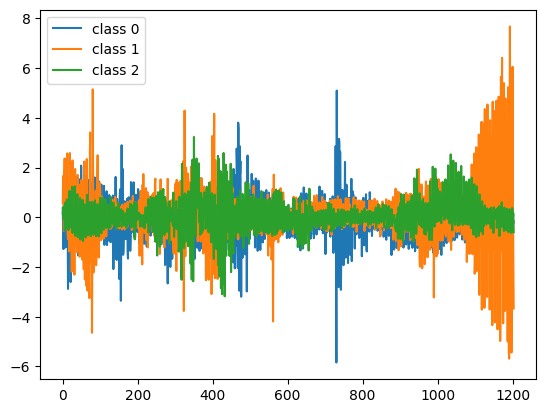

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = X_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
import keras
# Original model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3)
])

predictions = model(X_train[:1]).numpy()
predictions

array([[-1.1719785 ,  0.0873853 , -0.30432183]], dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.14483301, 0.5102727 , 0.34489435]], dtype=float32)

In [ ]:
y_train[:1]

array([2])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.0645173

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4029 - loss: 1.5025
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7441 - loss: 0.5395  
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.1862 
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9574 - loss: 0.1073 
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9768 - loss: 0.0824 
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0946 
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0309 
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0210 
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0150 
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0152 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0117 
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0075 


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3828 - loss: 1.7703
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8130 - loss: 0.5931
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9501 - loss: 0.2364
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9702 - loss: 0.0772
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9923 - loss: 0.0251
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0324
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0228
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0176
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0160  
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0097  
1/1 - 0s - 144ms/step - accuracy: 0.8235 - loss: 0.4041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4477 - loss: 1.42

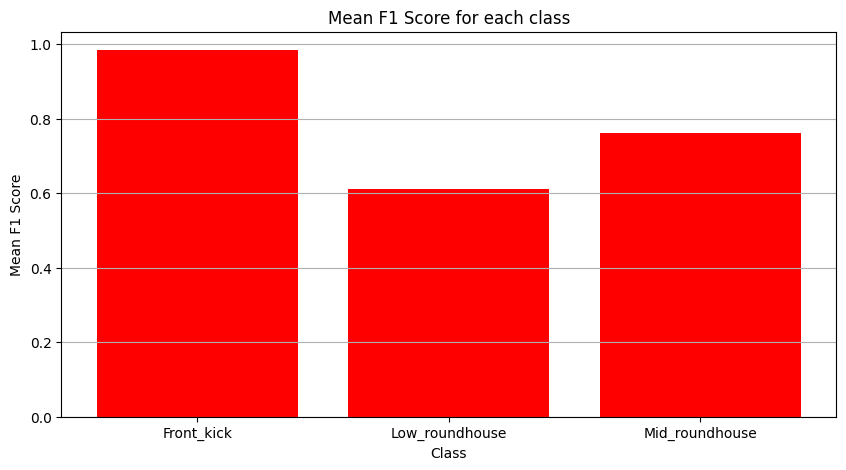

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True)

f1_scores_per_fold = []
accuracies_per_fold = []
testing_loss_per_fold = []
y_true_all = []
y_pred_all = []

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3)
  ])

  model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1)

  loss, accuracy = model.evaluate(X_test,  y_test, verbose=2)
  accuracies_per_fold.append(accuracy)
  testing_loss_per_fold.append(loss)

  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  y_true_all.extend(y_test)
  y_pred_all.extend(y_pred)
  f1_fold = f1_score(y_test, y_pred, average=None)

  f1_scores_per_fold.append(f1_fold)

print(f"Mean accuracy: {np.mean(accuracies_per_fold)}")
print(f"Mean loss: {np.mean(testing_loss_per_fold)}")

f1_scores_per_fold = np.array(f1_scores_per_fold)
mean_f1_scores = np.mean(f1_scores_per_fold, axis=0)

plt.figure(figsize=(10, 5))
plt.bar(range(len(mean_f1_scores)), mean_f1_scores, color='red')
plt.xlabel('Class')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score for each class')
plt.xticks(range(len(mean_f1_scores)), label_mapping.values())
plt.grid(axis='y')
plt.show()

In [ ]:
print(mean_f1_scores)

[0.98461538 0.61181818 0.76277056]


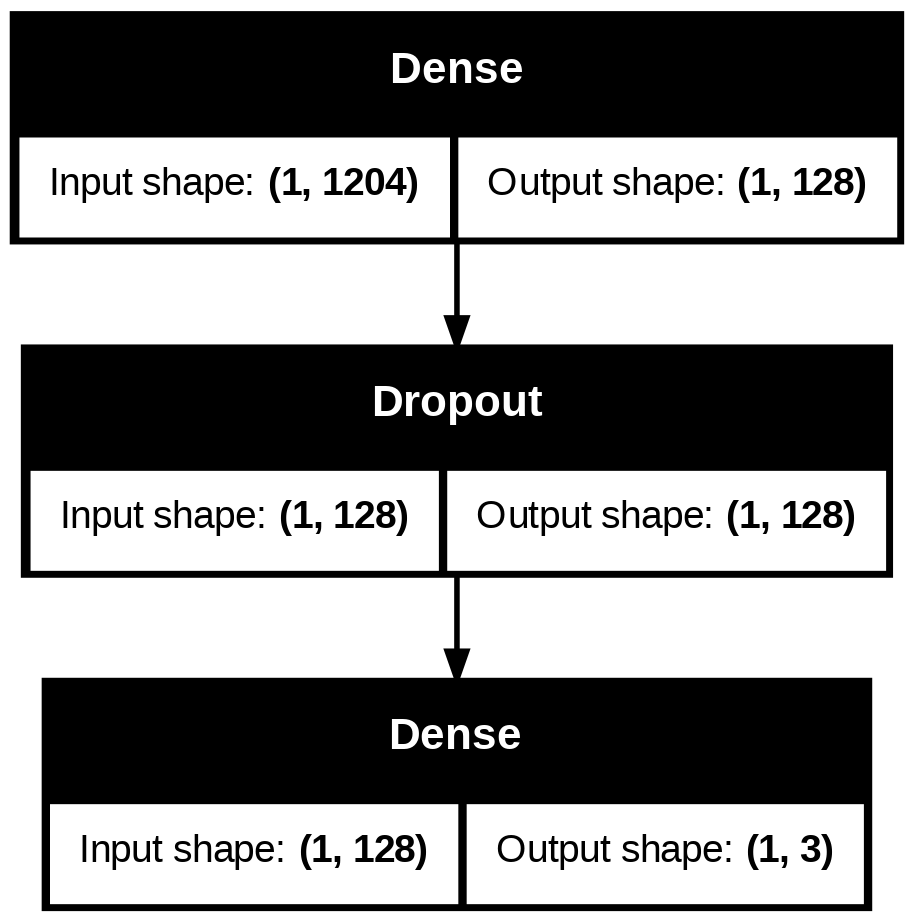

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

1/1 - 0s - 138ms/step - accuracy: 0.7500 - loss: 0.6425


[0.6425397992134094, 0.75]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


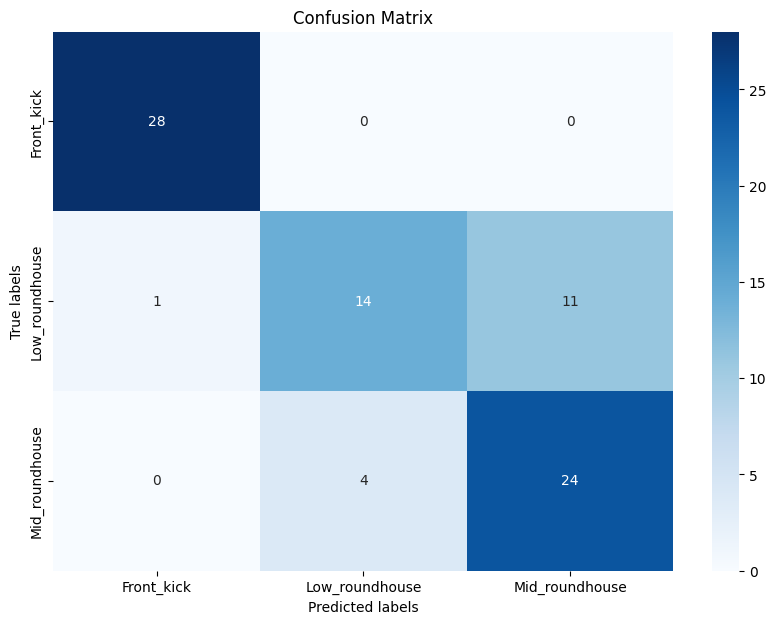

In [ ]:
from sklearn.metrics import confusion_matrix
label_mapping = {0:"Front_kick", 1:"Low_roundhouse", 2:"Mid_roundhouse"}
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_true_all, y_pred_all)

label_mapping_str = {idx: label_mapping[label] for idx, label in enumerate(range(len(cm)))}


cm_df = pd.DataFrame(cm, index=label_mapping.values(), columns=label_mapping.values())


# Create a heatmap plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
# probability_model.evaluate(X_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

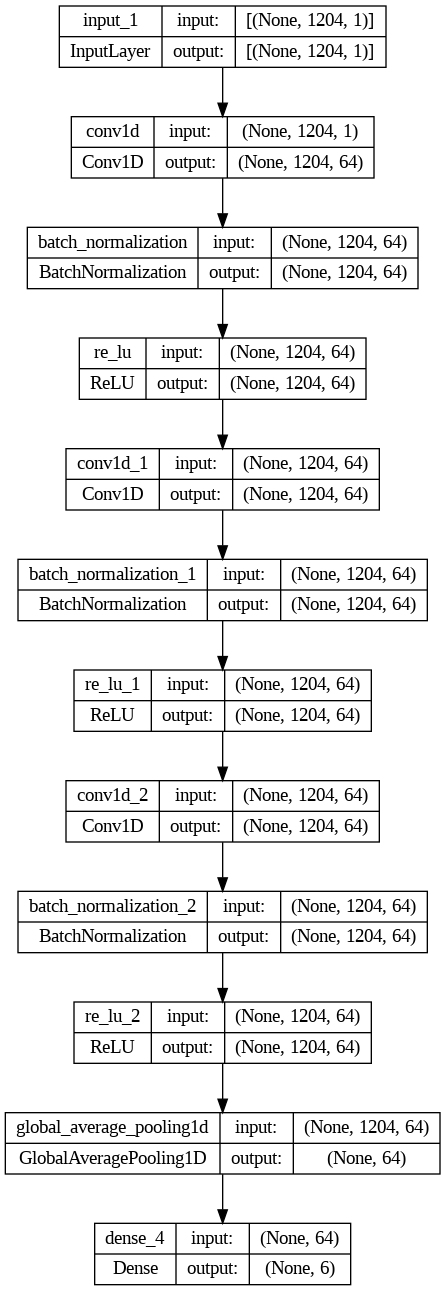

In [ ]:
# new model
import keras
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:


epochs = 500
batch_size = 4

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 3s 48ms/step - loss: 1.5462 - sparse_categorical_accuracy: 0.3600 - val_loss: 1.6664 - val_sparse_categorical_accuracy: 0.5600 - lr: 0.0010
Epoch 2/500
25/25 [==============================] - 1s 37ms/step - loss: 1.3419 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.6659 - val_sparse_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 3/500
25/25 [==============================] - 1s 38ms/step - loss: 1.2770 - sparse_categorical_accuracy: 0.5600 - val_loss: 1.7563 - val_sparse_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 4/500
25/25 [==============================] - 1s 42ms/step - loss: 1.2005 - sparse_categorical_accuracy: 0.6200 - val_loss: 1.8367 - val_sparse_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 5/500
25/25 [==============================] - 1s 56ms/step - loss: 1.1911 - sparse_categorical_accuracy: 0.5800 - val_loss: 2.0296 - val_sparse_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 6/500
25/25 [================

In [ ]:
model = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

1/1 [==============================] - 0s 470ms/step - loss: 0.2430 - sparse_categorical_accuracy: 0.8750
Test accuracy 0.875
Test loss 0.24298259615898132


In [ ]:
import tensorflow as tf
import keras
SAVED_MODEL_PATH = '/content/drive/MyDrive/DSS'
TFLITE_FILE_PATH = '/content/best_model.tflite'
model = keras.models.load_model("/content/drive/MyDrive/DSS/best_model.keras")

tf.saved_model.save(
    model, SAVED_MODEL_PATH)

converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH)
tflite_model = converter.convert()
with open(TFLITE_FILE_PATH, 'wb') as f:
  f.write(tflite_model)


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 100, 8], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
# After reading five seconds of data recording
# Read csv file and create a dataframe
subcolumns = ['ax', 'ay', 'az', 'am', 'rx', 'ry', 'rz']

path = "/content/drive/MyDrive/DSS/front_kick_sample.csv"

with open(path, 'r') as csvfile:
  lines = csvfile.readlines()

current_kick_rows = []
for line in lines:
  line.strip()
  current_kick_rows.append(list(map(float, line.split(','))))
sample_df = pd.DataFrame(current_kick_rows, columns=subcolumns)

# Convert rows into new columns
converted_df = create_dataframe_rows_as_columns(sample_df)

In [ ]:
def normalize_sample(df):
  mean_values = pd.read_pickle("mean_values.pkl")
  std_values = pd.read_pickle("std_values.pkl")
  for column_name in df.columns:
    df[column_name] = (df[column_name] - mean_values[column_name]) / std_values[column_name]
  return df


In [ ]:
from keras.models import load_model

model = load_model('/content/best_model.keras')
numpy_df = normalize_sample(converted_df).to_numpy()
print(numpy_df)
print(converted_df)
input_df = numpy_df.reshape((numpy_df.shape[0], numpy_df.shape[1], 1))
print(input_df.shape)
# print(input_df.shape)
# print(input_df)
input_df = np.load("/content/drive/MyDrive/DSS/input_df.npy")
print(input_df.shape)
predicted_labels = model.predict(input_df)

[[-2.33364435e+05  1.17702945e+06 -1.49257441e+02 ... -1.75904613e-01
  -2.67983538e-03 -1.84106793e-01]]
            ax_0          ay_1        az_2          am_3      rx_4      ry_5  \
0 -233364.435325  1.177029e+06 -149.257441 -1.808428e+06  0.002559 -0.235791   

       rz_6           ax_7           ay_8        az_9  ...   rx_1194  \
0  0.111238 -216615.677275  852740.095888 -351.660321  ... -0.151212   

    ry_1195   rz_1196     ax_1197       ay_1198      az_1199       am_1200  \
0  0.008104 -0.158067 -257.113541  19062.299578 -4595.659752 -21517.759718   

    rx_1201  ry_1202   rz_1203  
0 -0.175905 -0.00268 -0.184107  

[1 rows x 1204 columns]
(1, 1204, 1)
(1, 1204, 1)


1/1 [==============================] - 0s 151ms/step


In [ ]:
print(input_df)

[[[-3.8094764 ]
  [ 9.984381  ]
  [ 5.4218073 ]
  ...
  [-0.16700652]
  [ 0.01722747]
  [-0.10021868]]]


In [ ]:
np.argmax(predicted_labels)

1

In [ ]:
# x is numpy array of shape (n,sample columns)
# y is numpy array of shape (n,...)
def roll_data(x, y, window_len, step=1):
    out_len = x.shape[0] - (window_len - 1)
    retval = np.zeros((out_len, window_len, x.shape[1]))
    for c in range(window_len):
        retval[:out_len, c, :] = x[c : c + out_len, :]
    return retval, y[window_len - 1 :]


In [ ]:

retval, y = roll_data(X,y,5)

In [ ]:
print(len(retval))
print(len(X))
# print(retval)
# print(len(y))
print(X.shape)
print(retval.shape)

153
157
(157, 1204)
(153, 5, 1204)
